In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [61]:
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [63]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [64]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [65]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [66]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [67]:
df.shape

(6362620, 11)

In [68]:
df.shape[0]

6362620

In [69]:
print(round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2))

0.13


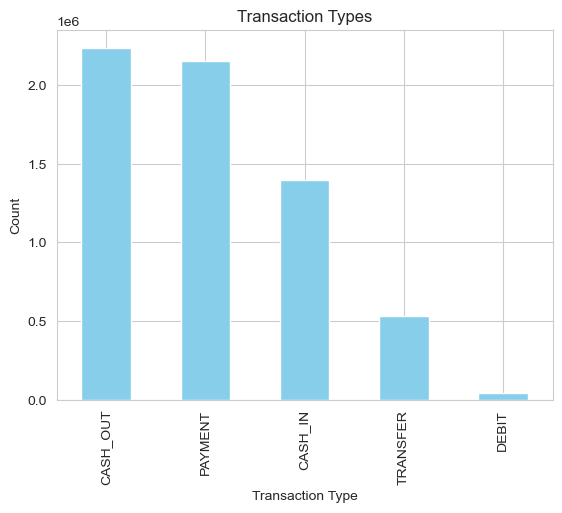

In [70]:
df["type"].value_counts().plot(kind='bar', title='Transaction Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

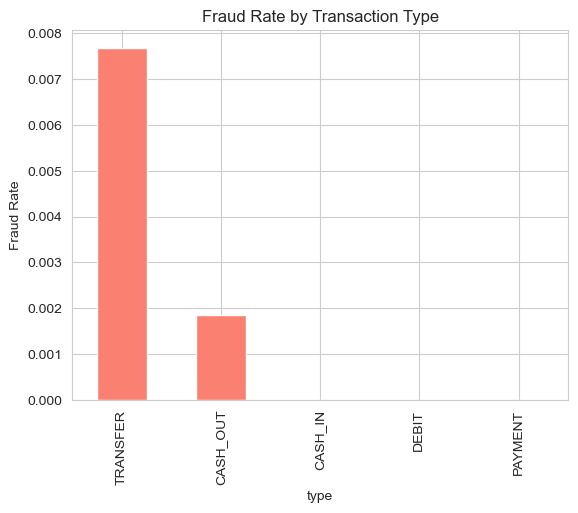

In [71]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color='salmon')
plt.ylabel('Fraud Rate')
plt.show()

In [72]:
df["amount"].describe().astype(np.int64)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

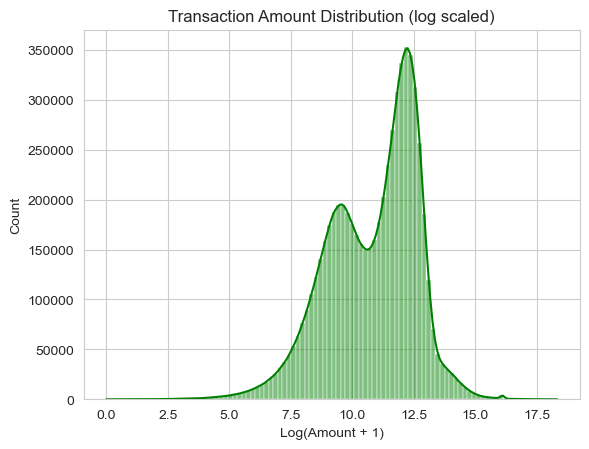

In [73]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='green')
plt.title('Transaction Amount Distribution (log scaled)')
plt.xlabel('Log(Amount + 1)')
plt.show()

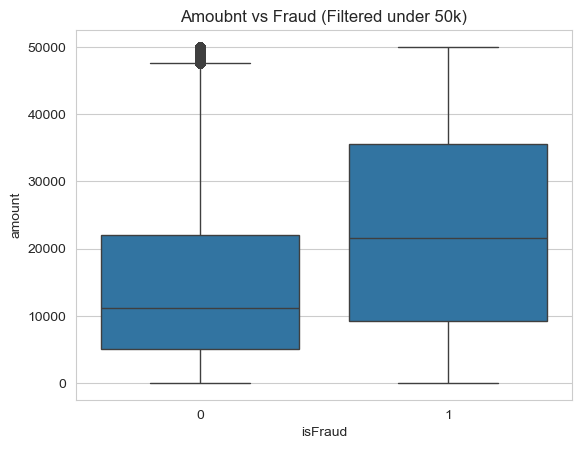

In [74]:
sns.boxplot(data = df[df["amount"] < 50000], x='isFraud', y='amount')
plt.title('Amoubnt vs Fraud (Filtered under 50k)')
plt.show()

In [75]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [76]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [77]:
# Ratio features
df['amount_to_oldbalance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['balance_change_ratio'] = df['newbalanceOrig'] / (df['oldbalanceOrg'] + 1)

# High-risk transaction type (TRANSFER and CASH_OUT)
df['high_risk_type'] = df['type'].isin(['TRANSFER', 'CASH_OUT']).astype(int)

# Frequency encoding for senders and receivers
sender_freq = df['nameOrig'].value_counts(normalize=True)
receiver_freq = df['nameDest'].value_counts(normalize=True)
df['sender_freq'] = df['nameOrig'].map(sender_freq)
df['receiver_freq'] = df['nameDest'].map(receiver_freq)

In [78]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [79]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [80]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,amount_to_oldbalance_ratio,balance_change_ratio,high_risk_type,sender_freq,receiver_freq
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,0.057834,0.942160,0,1.571680e-07,1.571680e-07
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,0.087731,0.912222,0,1.571680e-07,1.571680e-07
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0.994505,0.000000,1,1.571680e-07,6.915390e-06


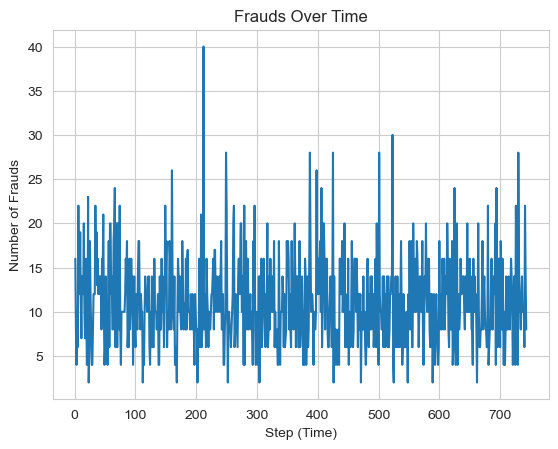

In [81]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel('Step (Time)')
plt.ylabel('Number of Frauds')
plt.title('Frauds Over Time')   
plt.grid(True)
plt.show()

In [82]:
df.drop(columns=['step'], inplace=True)

In [83]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,amount_to_oldbalance_ratio,balance_change_ratio,high_risk_type,sender_freq,receiver_freq
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,0.057834,0.942160,0,1.571680e-07,1.571680e-07
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,0.087731,0.912222,0,1.571680e-07,1.571680e-07
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0.994505,0.000000,1,1.571680e-07,6.915390e-06
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,0.994505,0.000000,1,1.571680e-07,6.443886e-06
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,0.280788,0.719188,0,1.571680e-07,1.571680e-07


In [84]:
top_senders = df['nameOrig'].value_counts().head(10)

In [85]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [86]:
top_receivers = df['nameDest'].value_counts().head(10)

In [87]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [88]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [89]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [90]:
fraud_types = df[df["type"].isin(['TRANSFER', 'CASH_OUT'])]

In [91]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

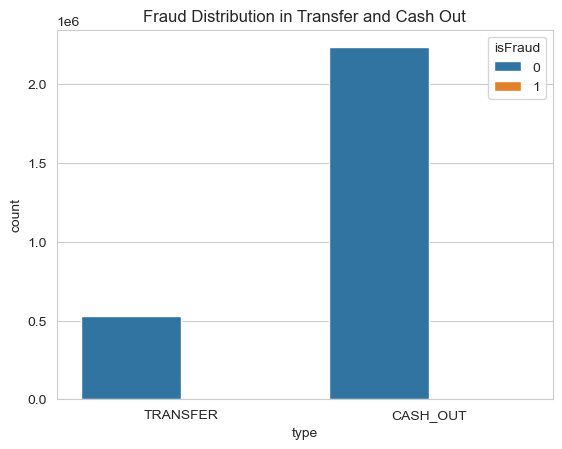

In [92]:
sns.countplot(data = fraud_types, x = "type",  hue = "isFraud")
plt.title('Fraud Distribution in Transfer and Cash Out')
plt.show()

In [93]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [94]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


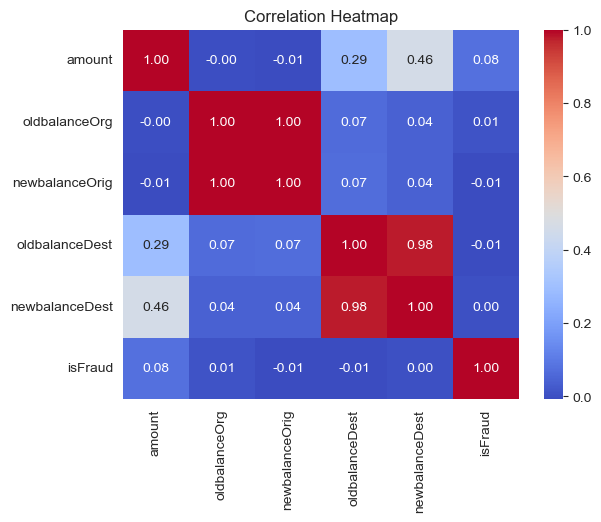

In [95]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [96]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(['TRANSFER', 'CASH_OUT'])) 
]

In [97]:
len(zero_after_transfer)

1188074

In [98]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,amount_to_oldbalance_ratio,balance_change_ratio,high_risk_type,sender_freq,receiver_freq
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,0.994505,0.0,1,1.571680e-07,0.000007
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00,0.994505,0.0,1,1.571680e-07,0.000006
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44,14.950668,0.0,1,1.571680e-07,0.000006
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00,304.972096,0.0,1,1.571680e-07,0.000007
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89,28.763925,0.0,1,1.571680e-07,0.000013


In [99]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [101]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest,amount_to_oldbalance_ratio,balance_change_ratio,high_risk_type,sender_freq,receiver_freq
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,0.057834,0.942160,0,1.571680e-07,1.571680e-07
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,0.087731,0.912222,0,1.571680e-07,1.571680e-07
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0.994505,0.000000,1,1.571680e-07,6.915390e-06
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,0.994505,0.000000,1,1.571680e-07,6.443886e-06
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,0.280788,0.719188,0,1.571680e-07,1.571680e-07


In [102]:
df_model = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'], axis=1, errors='ignore')

In [103]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest,amount_to_oldbalance_ratio,balance_change_ratio,high_risk_type,sender_freq,receiver_freq
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0,0.057834,0.942160,0,1.571680e-07,1.571680e-07
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0,0.087731,0.912222,0,1.571680e-07,1.571680e-07
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0,0.994505,0.000000,1,1.571680e-07,6.915390e-06
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0,0.994505,0.000000,1,1.571680e-07,6.443886e-06
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0,0.280788,0.719188,0,1.571680e-07,1.571680e-07


In [104]:
categorical = ['type', 'high_risk_type']
numerical = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
             'balanceDiffOrig', 'balanceDiffDest', 
             'amount_to_oldbalance_ratio', 'balance_change_ratio', 
             'sender_freq', 'receiver_freq']


In [105]:
y = df_model['isFraud']
X = df_model.drop('isFraud', axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first'), categorical)
    ],
    remainder='drop'
)

In [108]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline


xgb_model = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', xgb_model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest',
                                                   'amount_to_oldbalance_ratio',
                                                   'balance_change_ratio',
                                                   'sender_freq',
                                                   'receiver_freq']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type',
                                                   'high_risk_type'])])),...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [109]:
# pipeline.fit(X_train, y_train)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

# Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Overall accuracy
print(f"Accuracy: {pipeline.score(X_test, y_test) * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.64      1.00      0.78      2464

    accuracy                           1.00   1908786
   macro avg       0.82      1.00      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1904947    1375]
 [     10    2454]]
Precision-Recall AUC: 0.9609
Accuracy: 99.93%


In [111]:
import joblib

joblib.dump(pipeline, 'fraud_detection_pipeline_updated.pkl')
print("Pipeline saved as fraud_detection_pipeline_updated.pkl")

Pipeline saved as fraud_detection_pipeline_updated.pkl
